In [80]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import statsmodels.api as sm

In [66]:
df = pd.read_csv('data-midterm.csv')
df

,TimeToPlay,TimeToStudy,ProfessionalScore,InterviewScore,Sexuality,ExpectedSalary,SocialNetworkingTimeUse,Result
0,0.1,4.4,2.5,F,T,249.6,Much,NO
1,4.1,5.7,3.7,D,L,114.6,Pretty,YES
2,7.3,0.9,2.7,D,T,862.0,Almost,NO
3,6.2,8.8,2.7,D,T,147.2,Almost,YES
4,5.0,3.1,0.2,D,Q,653.4,Pretty,NO
...,...,...,...,...,...,...,...,...
995,2.9,6.3,1.2,C,Q,512.1,Almost,YES
996,3.8,1.5,2.8,B,T,267.6,Almost,NO
997,7.4,0.6,1.3,D,Q,884.2,NaN,YES
998,8.5,5.7,3.3,C,L,662.2,Pretty,YES


In [92]:
import pandas as pd

# Giả sử df là dataframe của bạn chứa dữ liệu
# df = pd.read_csv('file.csv')  # Đọc dữ liệu từ file CSV nếu cần

# Tính Q1 và Q3
Q1 = df['ProfessionalScore'].quantile(0.25)
Q3 = df['ProfessionalScore'].quantile(0.75)

# Tính IQR
IQR = Q3 - Q1

# Tính ngưỡng dưới và ngưỡng trên
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Tìm các giá trị bất thường
outliers = df[(df['ProfessionalScore'] < lower_bound) | (df['ProfessionalScore'] > upper_bound)]

# In ra kết quả
print(f"Ngưỡng dưới: {lower_bound}")
print(f"Ngưỡng trên: {upper_bound}")
print("Các giá trị bất thường:")
print(outliers[['ProfessionalScore']])


Ngưỡng dưới: -1.8499999999999996
Ngưỡng trên: 5.75
Các giá trị bất thường:
Empty DataFrame
Columns: [ProfessionalScore]
Index: []


In [90]:
import pandas as pd
import statsmodels.api as sm

# Giả sử df là dataframe của bạn chứa dữ liệu
# df = pd.read_csv('file.csv')  # Đọc dữ liệu từ file CSV nếu cần

# Chọn biến độc lập và phụ thuộc
X = df[['TimeToPlay', 'TimeToStudy']]  # Các biến độc lập
y = df['ProfessionalScore']              # Biến phụ thuộc

# Thêm hằng số vào mô hình
X = sm.add_constant(X)

# Xây dựng mô hình hồi quy tuyến tính
model = sm.OLS(y, X).fit()

# Hiển thị tóm tắt kết quả mô hình
print(model.summary())

# Tìm hệ số của TimeToPlay
coef_time_to_play = model.params['TimeToPlay']

# Tính ảnh hưởng
impact = coef_time_to_play

print(f"Nếu thời gian nghỉ ngơi tăng thêm 1 đơn vị, điểm số sẽ thay đổi {impact:.4f} điểm.")


                            OLS Regression Results                            
Dep. Variable:      ProfessionalScore   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.253
Date:                Sat, 12 Oct 2024   Prob (F-statistic):              0.286
Time:                        16:34:55   Log-Likelihood:                -1550.3
No. Observations:                1000   AIC:                             3107.
Df Residuals:                     997   BIC:                             3121.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.8134      0.096     18.860      

In [88]:
df['SocialNetworkingTimeUse'].fillna('None', inplace=True)

C:\Users\duclp\AppData\Local\Temp\ipykernel_5028\2971676004.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SocialNetworkingTimeUse'].fillna('None', inplace=True)


In [89]:
# Sử dụng One-Hot Encoding cho cột SocialNetworkingTimeUse
df_encoded = pd.get_dummies(df, columns=['SocialNetworkingTimeUse'], prefix='SNTU')

# Hiển thị dataframe sau khi mã hóa
print(df_encoded.head())

   TimeToPlay  TimeToStudy  ProfessionalScore InterviewScore Sexuality  \
0         0.1          4.4                2.5              F         T   
1         4.1          5.7                3.7              D         L   
2         7.3          0.9                2.7              D         T   
3         6.2          8.8                2.7              D         T   
4         5.0          3.1                0.2              D         Q   

   ExpectedSalary Result  SNTU_Almost  SNTU_Much  SNTU_None  SNTU_Pretty  \
0           249.6     NO        False       True      False        False   
1           114.6    YES        False      False      False         True   
2           862.0     NO         True      False      False        False   
3           147.2    YES         True      False      False        False   
4           653.4     NO        False      False      False         True   

   SNTU_Rarely  
0        False  
1        False  
2        False  
3        False  
4        Fals

Câu 1

In [81]:
# Biến độc lập: TimeToPlay và TimeToStudy
X = df[['TimeToPlay', 'TimeToStudy']]

# Thêm cột hệ số chặn (constant) cho mô hình hồi quy
X = sm.add_constant(X)

# Biến phụ thuộc: ProfessionalScore
y = df['ProfessionalScore']

# Xây dựng mô hình hồi quy OLS
model = sm.OLS(y, X).fit()

# Hiển thị kết quả hồi quy
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      ProfessionalScore   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.253
Date:                Sat, 12 Oct 2024   Prob (F-statistic):              0.286
Time:                        16:23:20   Log-Likelihood:                -1550.3
No. Observations:                1000   AIC:                             3107.
Df Residuals:                     997   BIC:                             3121.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.8134      0.096     18.860      

In [82]:
X = df[['TimeToPlay', 'TimeToStudy']]  # Biến độc lập
y = df['ProfessionalScore']  # Biến phụ thuộc

# Thêm hằng số cho mô hình (constant term)
X = sm.add_constant(X)

# Xây dựng mô hình OLS
model = sm.OLS(y, X).fit()

# Xem kết quả hồi quy
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      ProfessionalScore   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.253
Date:                Sat, 12 Oct 2024   Prob (F-statistic):              0.286
Time:                        16:26:49   Log-Likelihood:                -1550.3
No. Observations:                1000   AIC:                             3107.
Df Residuals:                     997   BIC:                             3121.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.8134      0.096     18.860      

Câu 2

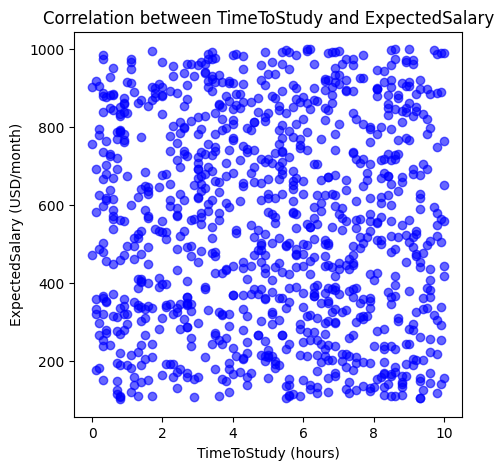

In [67]:
# Vẽ đồ thị phân tán
plt.figure(figsize=(5, 5))
plt.scatter(df['TimeToStudy'], df['ExpectedSalary'], color='blue', alpha=0.6)

# Thêm tiêu đề và nhãn trục
plt.title('Correlation between TimeToStudy and ExpectedSalary')
plt.xlabel('TimeToStudy (hours)')
plt.ylabel('ExpectedSalary (USD/month)')

# Hiển thị đồ thị
plt.show()

Câu 4

In [68]:
# Lọc dữ liệu với điều kiện Sexuality là 'T' và InterviewScore là 'B'
filtered_data = df[(df['Sexuality'] == 'T') & (df['InterviewScore'] == 'B')]

# Lấy cột TimeToPlay từ dữ liệu đã lọc
time_to_play = filtered_data['TimeToPlay']

# Thực hiện kiểm định t-test một mẫu so với giá trị trung bình giả thuyết là 2.5
test_stat, p_value = stats.ttest_1samp(time_to_play, 2.5)
p_value

np.float64(0.028975455332700663)

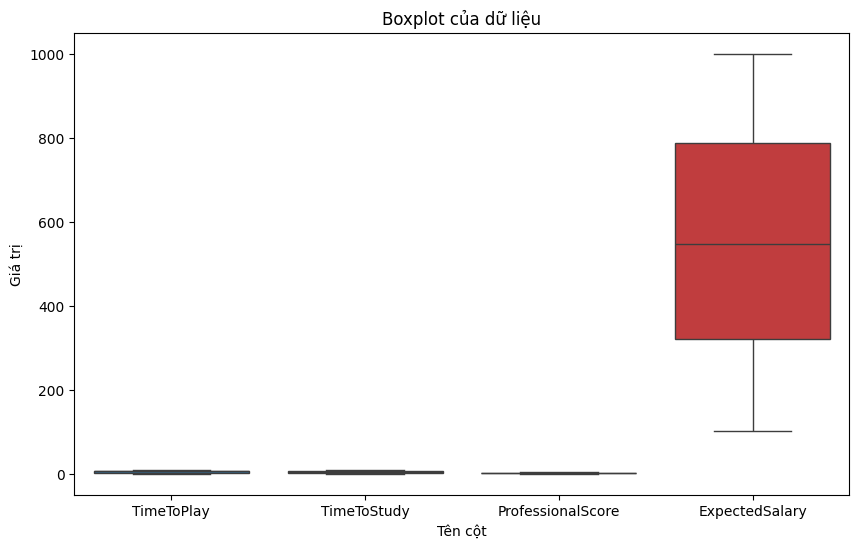

In [69]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)  # Hoặc bạn có thể chỉ định cột cụ thể: data['ten_cot']
plt.title('Boxplot của dữ liệu')
plt.xlabel('Tên cột')
plt.ylabel('Giá trị')
plt.show()

Câu 9

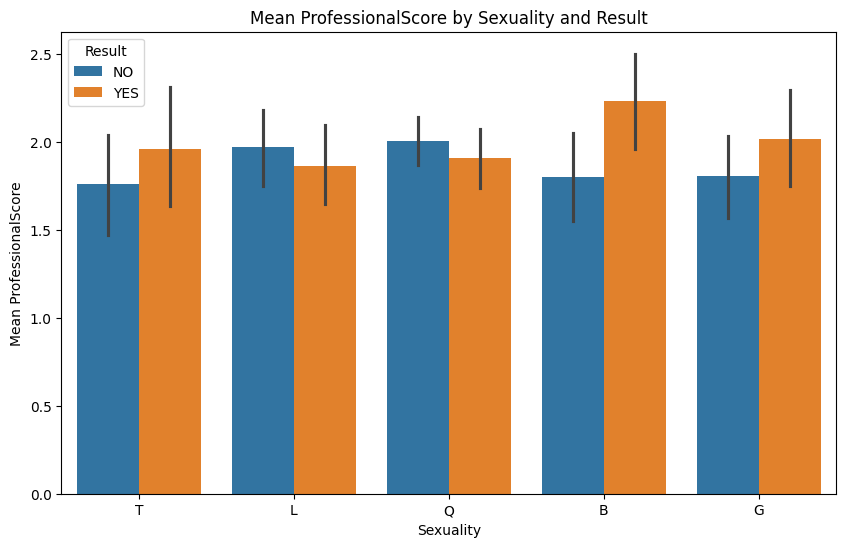

In [70]:
# Vẽ biểu đồ cột để so sánh trung bình ProfessionalScore theo nhóm Sexuality và Result
plt.figure(figsize=(10, 6))
sns.barplot(x='Sexuality', y='ProfessionalScore', hue='Result', data=df, estimator=lambda x: sum(x)/len(x))

# Thêm tiêu đề và nhãn cho trục
plt.title('Mean ProfessionalScore by Sexuality and Result')
plt.xlabel('Sexuality')
plt.ylabel('Mean ProfessionalScore')

# Hiển thị biểu đồ
plt.show()

In [71]:
df['TimeToStudy'].quantile(0.1)

np.float64(0.9)

In [72]:
df.describe()

,TimeToPlay,TimeToStudy,ProfessionalScore,ExpectedSalary
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.077300,5.064000,1.939700,549.826700
std,2.882923,2.843235,1.142383,263.479774
min,0.000000,0.000000,0.000000,102.100000
25%,2.600000,2.700000,1.000000,321.775000
50%,5.300000,5.200000,2.000000,546.300000
75%,7.500000,7.400000,2.900000,787.700000
max,10.000000,10.000000,4.000000,999.900000


Câu 14

In [73]:
# Xây dựng bảng Crosstab giữa Sexuality và InterviewScore
crosstab_result = pd.crosstab(df['Sexuality'], df['InterviewScore'])

# In ra bảng Crosstab
print(crosstab_result)

InterviewScore   A   B    C    D   F
Sexuality                           
B                5  24   30   42  32
G                8  19   40   46  34
L                9  37   64   54  38
Q               16  65  126  122  84
T                6  15   31   32  21


Câu 15

In [74]:
# df['bin1'] = pd.qcut(df['TimeToPlay'], q=5)
# df

Câu 16

In [75]:
pivot_table = df.pivot_table(values='TimeToStudy', index='Sexuality', columns='Result', aggfunc='mean')

# In ra pivot table
print(pivot_table)

Result           NO       YES
Sexuality                    
B          5.473438  4.785507
G          5.240741  5.828788
L          4.750000  5.464583
Q          4.877143  5.167488
T          4.165625  5.034146


Câu 17

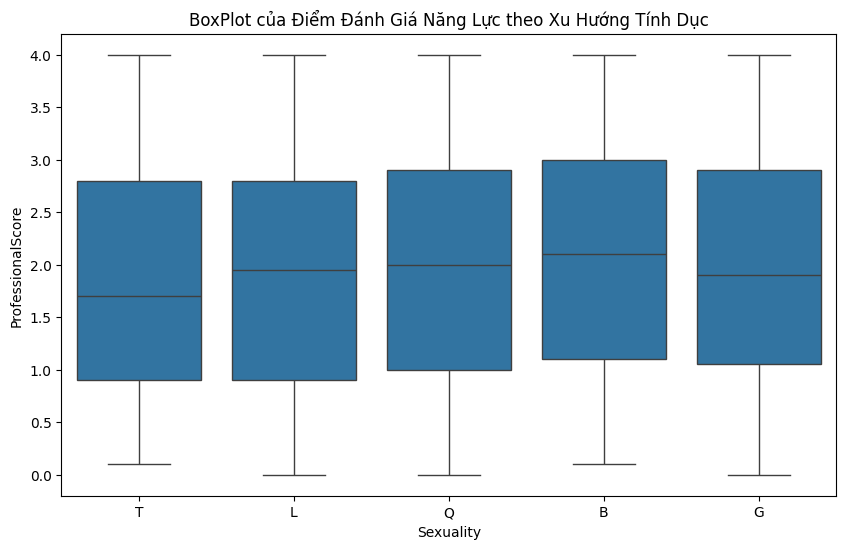

In [76]:
# Vẽ biểu đồ BoxPlot cho ProfessionalScore dựa trên các nhóm Sexuality
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sexuality', y='ProfessionalScore', data=df)
plt.title('BoxPlot của Điểm Đánh Giá Năng Lực theo Xu Hướng Tính Dục')
plt.show()

Câu 18

In [77]:
# Bước 1: Tính toán Q1, Q3 và IQR
Q1 = df['ProfessionalScore'].quantile(0.25)
Q3 = df['ProfessionalScore'].quantile(0.75)
IQR = Q3 - Q1

# Bước 2: Xác định các ngưỡng bất thường
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Ngưỡng dưới: {lower_bound}")
print(f"Ngưỡng trên: {upper_bound}")

# Bước 3: Xác định các giá trị bất thường
outliers = df[(df['ProfessionalScore'] < lower_bound) | (df['ProfessionalScore'] > upper_bound)]

print("Các giá trị bất thường:")
print(outliers[['ProfessionalScore']])

Ngưỡng dưới: -1.8499999999999996
Ngưỡng trên: 5.75
Các giá trị bất thường:
Empty DataFrame
Columns: [ProfessionalScore]
Index: []


Câu 19

In [78]:
# Tính trung bình của TimeToStudy và TimeToPlay
mean_study = df['TimeToStudy'].mean()
mean_play = df['TimeToPlay'].mean()

# In ra trung bình
print(f"Trung bình thời gian học: {mean_study}")
print(f"Trung bình thời gian chơi: {mean_play}")

# Kiểm định T cho một mẫu
t_statistic, p_value = stats.ttest_1samp(df['TimeToStudy'] - df['TimeToPlay'], 0)

# Kết quả kiểm định
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# So sánh p-value với mức ý nghĩa 0.05
alpha = 0.05
if p_value < alpha:
    print("Có đủ chứng cứ để bác bỏ giả thuyết không. Trung bình thời gian học và thời gian chơi là khác nhau.")
else:
    print("Không có đủ chứng cứ để bác bỏ giả thuyết không. Trung bình thời gian học và thời gian chơi có thể là bằng nhau.")

Trung bình thời gian học: 5.064
Trung bình thời gian chơi: 5.0773
T-statistic: -0.10555452694440287
P-value: 0.9159569952699564
Không có đủ chứng cứ để bác bỏ giả thuyết không. Trung bình thời gian học và thời gian chơi có thể là bằng nhau.


Câu 20

In [79]:
# Thực hiện One-Hot Encoding
df_one_hot = pd.get_dummies(df, columns=['SocialNetworkingTimeUse'], prefix='SocialNetwork')

# Hiển thị cột SocialNetworkingTimeUse sau khi mã hóa
print("Sau khi mã hóa One-Hot:")
df_one_hot.head()  # Hiển thị 5 dòng đầu tiên để xem kết quả

Sau khi mã hóa One-Hot:


,TimeToPlay,TimeToStudy,ProfessionalScore,InterviewScore,Sexuality,ExpectedSalary,Result,SocialNetwork_Almost,SocialNetwork_Much,SocialNetwork_Pretty,SocialNetwork_Rarely
0,0.1,4.4,2.5,F,T,249.6,NO,False,True,False,False
1,4.1,5.7,3.7,D,L,114.6,YES,False,False,True,False
2,7.3,0.9,2.7,D,T,862.0,NO,True,False,False,False
3,6.2,8.8,2.7,D,T,147.2,YES,True,False,False,False
4,5.0,3.1,0.2,D,Q,653.4,NO,False,False,True,False


In [83]:
df.dtypes

TimeToPlay                 float64
TimeToStudy                float64
ProfessionalScore          float64
InterviewScore              object
Sexuality                   object
ExpectedSalary             float64
SocialNetworkingTimeUse     object
Result                      object
dtype: object